# Mig Jupiter

## x: angles y: radius

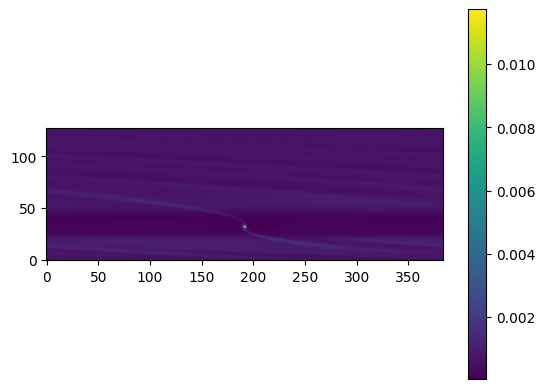

In [6]:
import numpy as np
import matplotlib.pyplot as plt

nx, ny = 384, 128
data = np.fromfile("./outputs/fargo_mig_paral/gasdens50.dat").reshape(ny, nx)

plt.imshow(data, origin="lower")
plt.colorbar()
plt.show()

## real 

/tmp/ipykernel_40270/1720818046.py:26: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(X, Y, dens, shading='auto')


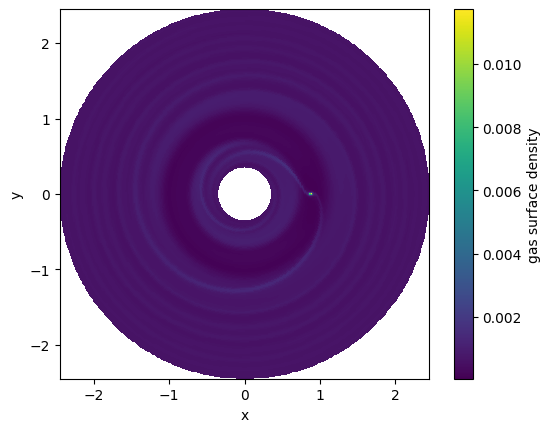

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Load grid edges
phi_edges = np.loadtxt("./outputs/fargo_mig_paral/domain_x.dat")
r_edges   = np.loadtxt("./outputs/fargo_mig_paral/domain_y.dat")

# Read density and infer ny from data size
dens = np.fromfile("./outputs/fargo_mig_paral/gasdens50.dat")
nx = len(phi_edges) - 1
ny = dens.size // nx
dens = dens.reshape(ny, nx)

# Trim radial edges to match ny (remove extra/ghost edges)
r_edges = r_edges[:ny+1]

# Compute cell-center coordinates
phi = 0.5 * (phi_edges[:-1] + phi_edges[1:])
r   = 0.5 * (r_edges[:-1] + r_edges[1:])

# Convert to Cartesian coordinates
Phi, R = np.meshgrid(phi, r)
X = R * np.cos(Phi)
Y = R * np.sin(Phi)

plt.pcolormesh(X, Y, dens, shading='auto')
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(label="gas surface density")
plt.show()


# Compare Jupiter_unmig (doesn't feel disk) with Jupiter_mig (feel disk)

In [26]:
import numpy as np

dir_mig    = "./outputs/fargo_mig_paral/"
dir_nonmig = "./outputs/fargo_paral/"

def check_data_stats(label, directory, frame):
    fname = f"{directory}/gasdens{frame}.dat"
    try:
        data = np.fromfile(fname)
        print(f"--- {label} ---")
        print(f"File: {fname}")
        print(f"Min Value: {np.min(data):.5e}")
        print(f"Max Value: {np.max(data):.5e}")
        print(f"Mean Value: {np.mean(data):.5e}")
        print(f"Has NaNs? {np.isnan(data).any()}") 
        print("-" * 30)
    except Exception as e:
        print(f"Error reading {label}: {e}")

check_data_stats("Non-Mig Initial", dir_nonmig, 0)
check_data_stats("Non-Mig Final",   dir_nonmig, 50)
check_data_stats("Mig Initial",     dir_mig,    0)
check_data_stats("Mig Final",       dir_mig,    50)

--- Non-Mig Initial ---
File: ./outputs/fargo_paral//gasdens0.dat
Min Value: 6.36620e-04
Max Value: 6.36620e-04
Mean Value: 6.36620e-04
Has NaNs? False
------------------------------
--- Non-Mig Final ---
File: ./outputs/fargo_paral//gasdens50.dat
Min Value: 4.51325e-05
Max Value: 1.02196e-02
Mean Value: 6.32254e-04
Has NaNs? False
------------------------------
--- Mig Initial ---
File: ./outputs/fargo_mig_paral//gasdens0.dat
Min Value: 6.36620e-04
Max Value: 6.36620e-04
Mean Value: 6.36620e-04
Has NaNs? False
------------------------------
--- Mig Final ---
File: ./outputs/fargo_mig_paral//gasdens50.dat
Min Value: 4.66176e-05
Max Value: 1.17315e-02
Mean Value: 6.29749e-04
Has NaNs? False
------------------------------


In [28]:
import numpy as np

dir_mig    = "./outputs/fargo_mig_paral/"
dir_nonmig = "./outputs/fargo_paral/"

def check_data_stats(label, directory, frame):
    fname = f"{directory}/gasdens{frame}.dat"
    try:
        data = np.fromfile(fname)
        print(f"--- {label} ---")
        print(f"File: {fname}")
        print(f"Min Value: {np.min(data):.5e}")
        print(f"Max Value: {np.max(data):.5e}")
        print(f"Mean Value: {np.mean(data):.5e}")
        print(f"Has NaNs? {np.isnan(data).any()}") 
        print("-" * 30)
    except Exception as e:
        print(f"Error reading {label}: {e}")

check_data_stats("Non-Mig Initial", dir_nonmig, 0)
check_data_stats("Non-Mig Final",   dir_nonmig, 50)
check_data_stats("Mig Initial",     dir_mig,    0)
check_data_stats("Mig Final",       dir_mig,    50)

--- Non-Mig Initial ---
File: ./outputs/fargo_paral//gasdens0.dat
Min Value: 6.36620e-04
Max Value: 6.36620e-04
Mean Value: 6.36620e-04
Has NaNs? False
------------------------------
--- Non-Mig Final ---
File: ./outputs/fargo_paral//gasdens50.dat
Min Value: 4.51325e-05
Max Value: 1.02196e-02
Mean Value: 6.32254e-04
Has NaNs? False
------------------------------
--- Mig Initial ---
File: ./outputs/fargo_mig_paral//gasdens0.dat
Min Value: 6.36620e-04
Max Value: 6.36620e-04
Mean Value: 6.36620e-04
Has NaNs? False
------------------------------
--- Mig Final ---
File: ./outputs/fargo_mig_paral//gasdens50.dat
Min Value: 4.66176e-05
Max Value: 1.17315e-02
Mean Value: 6.29749e-04
Has NaNs? False
------------------------------


/tmp/ipykernel_40270/511501338.py:90: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  im = ax.pcolormesh(X, Y, dens,


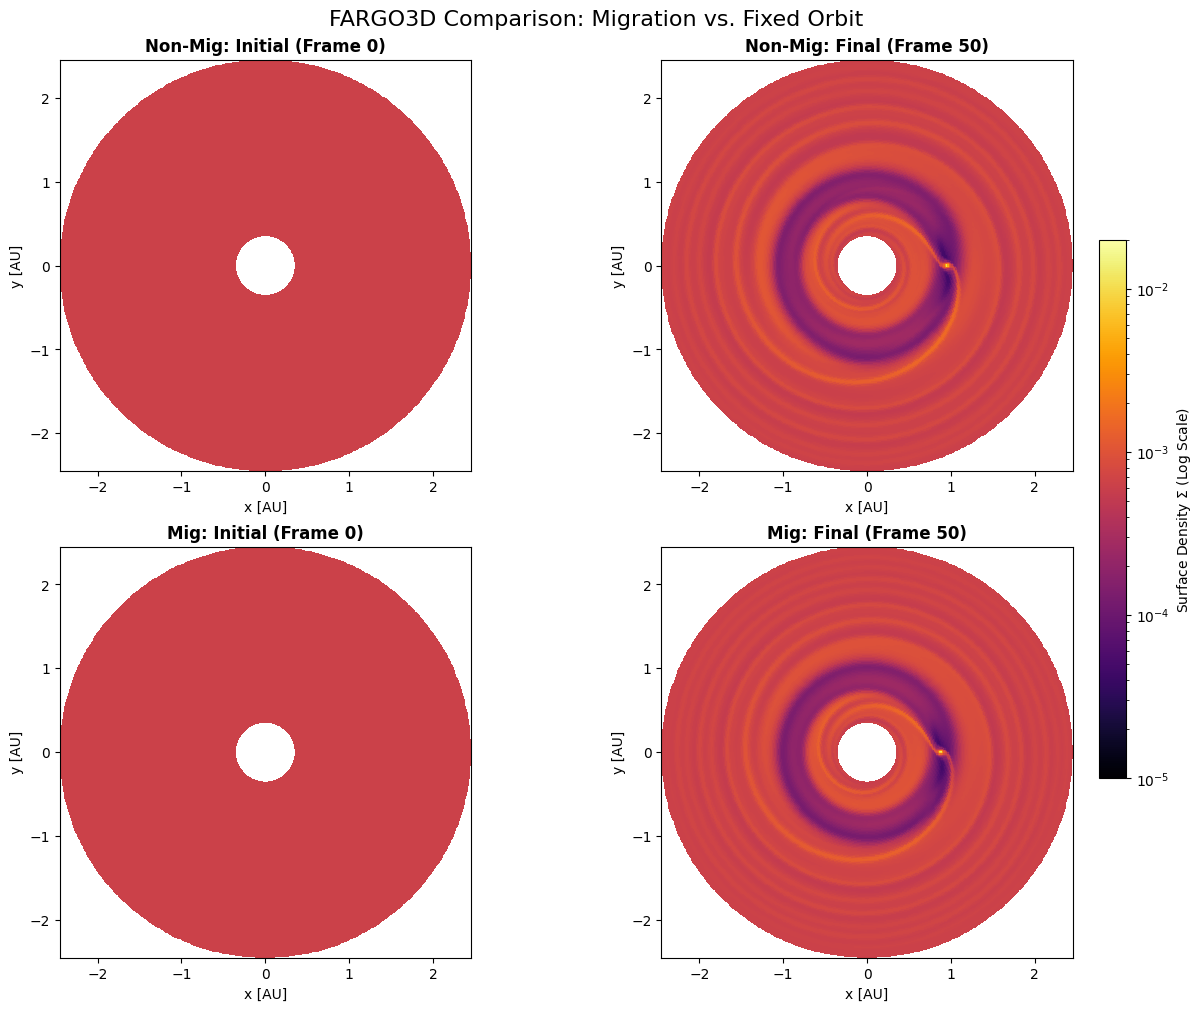

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# ==========================================
# 1. Configuration: Path Settings
# ==========================================
# Based on your debug output:
dir_mig    = "./outputs/fargo_mig_paral/"
dir_nonmig = "./outputs/fargo_paral/"      

# Frames to compare (Initial vs Final)
frame_init = 0
frame_final = 50

# ==========================================
# 2. Helper Function to load data
# ==========================================
def load_fargo_frame(data_dir, frame_num):
    """
    Reads grid and density data from a specific FARGO3D output directory and frame.
    Returns: X, Y (Cartesian coords), dens (Surface Density)
    """
    # Load grid edges (boundaries)
    try:
        phi_edges = np.loadtxt(f"{data_dir}/domain_x.dat")
        r_edges   = np.loadtxt(f"{data_dir}/domain_y.dat")
    except OSError:
        print(f"Error: Could not find domain files in {data_dir}")
        return None, None, None

    # Load density binary file
    fname = f"{data_dir}/gasdens{frame_num}.dat"
    try:
        raw_data = np.fromfile(fname)
    except OSError:
        print(f"Error: Could not find {fname}")
        return None, None, None
    
    # Infer grid dimensions
    nx = len(phi_edges) - 1
    ny = raw_data.size // nx
    
    # Reshape density
    dens = raw_data.reshape(ny, nx)
    
    # Trim radial edges if ghost cells exist (match ny)
    r_edges = r_edges[:ny+1]
    
    # Compute cell centers (Polar)
    phi_centers = 0.5 * (phi_edges[:-1] + phi_edges[1:])
    r_centers   = 0.5 * (r_edges[:-1] + r_edges[1:])
    
    # Create 2D meshgrid (Polar)
    Phi, R = np.meshgrid(phi_centers, r_centers)
    
    # Convert to Cartesian
    X = R * np.cos(Phi)
    Y = R * np.sin(Phi)
    
    return X, Y, dens

# ==========================================
# 3. Main Plotting Logic
# ==========================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# Define scenarios list for iteration: (Title, Directory, Frame, Axes_Index)
scenarios = [
    ("Non-Mig: Initial (Frame 0)", dir_nonmig, frame_init,  axes[0, 0]),
    ("Non-Mig: Final (Frame 50)",  dir_nonmig, frame_final, axes[0, 1]),
    ("Mig: Initial (Frame 0)",     dir_mig,    frame_init,  axes[1, 0]),
    ("Mig: Final (Frame 50)",      dir_mig,    frame_final, axes[1, 1])
]

# --- CRITICAL FIX: Adjust Color Scale Range ---
# Your data max is ~0.01 and min is ~4e-5.
# We set vmin=1e-5 (to see deep gaps) and vmax=2e-2 (to see bright spiral arms).
vmin_val = 1e-5
vmax_val = 2e-2

for title, path, frame, ax in scenarios:
    X, Y, dens = load_fargo_frame(path, frame)
    
    if X is None: 
        ax.text(0.5, 0.5, "Data Not Found", ha='center')
        continue

    # Plot using LogNorm for better visibility of gaps/spirals
    im = ax.pcolormesh(X, Y, dens, 
                       norm=LogNorm(vmin=vmin_val, vmax=vmax_val), 
                       cmap='inferno', 
                       shading='auto')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_aspect('equal')
    ax.set_xlabel("x [AU]")
    ax.set_ylabel("y [AU]")

# Add a single colorbar for the whole figure
cbar = fig.colorbar(im, ax=axes[:, 1], shrink=0.6, label=r"Surface Density $\Sigma$ (Log Scale)")

plt.suptitle(f"FARGO3D Comparison: Migration vs. Fixed Orbit", fontsize=16)
plt.show()